# **Paddy Disease Detection** using Deep Learning

### **Problem Statement**

Rice (Oryza sativa) is one of the staple foods worldwide. Paddy, the raw grain before removal of husk, is cultivated in tropical climates, mainly in Asian countries. Paddy cultivation requires consistent supervision because several diseases and pests might affect the paddy crops, leading to up to 70% yield loss. Expert supervision is usually necessary to mitigate these diseases and prevent crop loss. With the limited availability of crop protection experts, manual disease diagnosis is tedious and expensive. Thus, it is increasingly important to automate the disease identification process by leveraging computer vision-based techniques that achieved promising results in various domains.


### **Objective**

The main objective of this competition is to develop a machine or deep learning-based model to classify the given paddy leaf images accurately. We provide a training dataset of 10,407 (75%) labeled images across ten classes (nine disease categories and normal leaf). Moreover, we also provide additional metadata for each image, such as the paddy variety and age. Your task is to classify each paddy image in the given test dataset of 3,469 (25%) images into one of the nine disease categories or a normal leaf.

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import layers , models
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/paddy-disease-classification/train.csv')

In [ ]:
data.head()

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


In [ ]:
data.shape

(10407, 4)

In [ ]:
data['label'].unique().tolist()

['bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro']

In [ ]:
data['variety'].unique().tolist()

['ADT45',
 'IR20',
 'KarnatakaPonni',
 'Onthanel',
 'Ponni',
 'Surya',
 'Zonal',
 'AndraPonni',
 'AtchayaPonni',
 'RR']

In [ ]:
data['age'].describe()

,age
count,10407.000000
mean,64.043624
std,8.958830
min,45.000000
25%,60.000000
50%,67.000000
75%,70.000000
max,82.000000


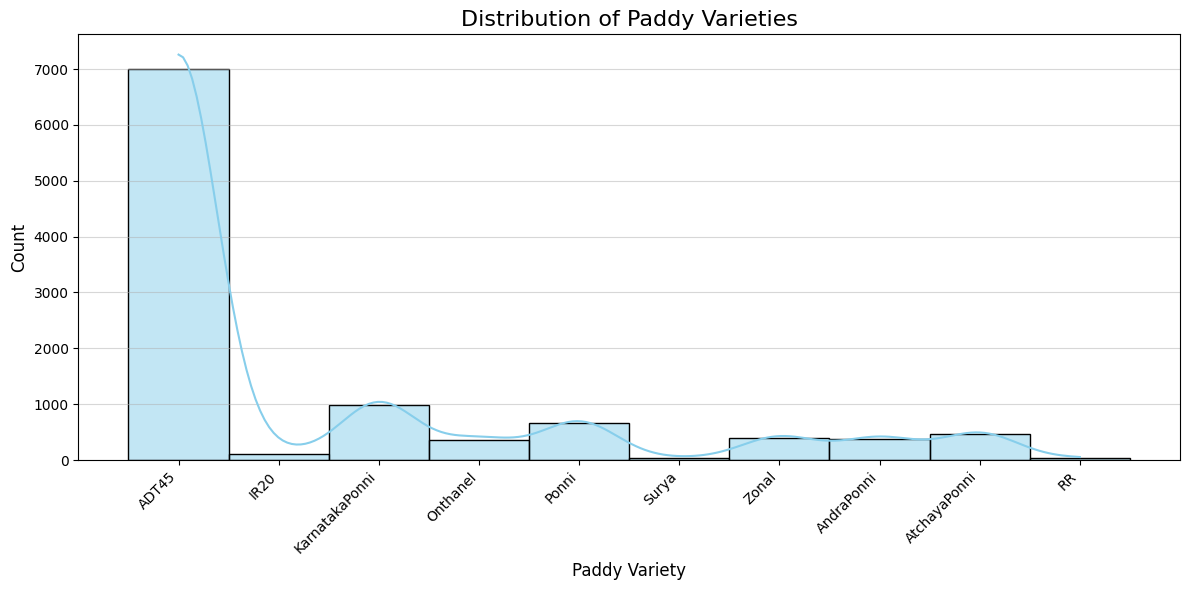

In [ ]:

plt.figure(figsize=(12, 6))
sns.histplot(data['variety'], kde=True, color='skyblue', edgecolor='black')

plt.title('Distribution of Paddy Varieties', fontsize=16)
plt.xlabel('Paddy Variety', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)

plt.tight_layout()
plt.show()


1. The distribution of paddy varieties in the dataset is highly skewed.  A few varieties are significantly more prevalent than others.  The plot shows the frequency of each paddy variety.
2. We can see that most of the images are of ADT45 variety in our dataset

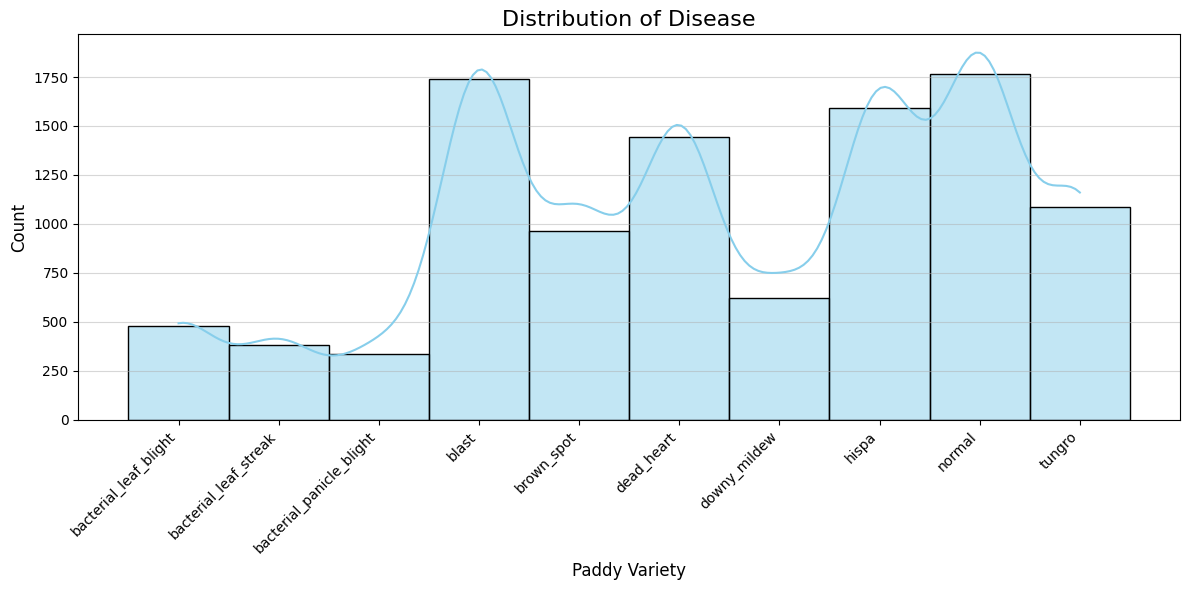

In [ ]:

plt.figure(figsize=(12, 6))
sns.histplot(data['label'], kde=True, color='skyblue', edgecolor='black')

plt.title('Distribution of Disease', fontsize=16)
plt.xlabel('Paddy Variety', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)

plt.tight_layout()
plt.show()


In [ ]:
normal = data[data['label'] =='normal']
normal = normal[normal['variety'] =='ADT45']
five_normals = normal.image_id[:5].values
five_normals.tolist()

['100007.jpg', '100025.jpg', '100135.jpg', '100165.jpg', '100171.jpg']

In [ ]:
dead = data[data['label'] =='dead_heart']
dead = dead[dead['variety'] =='ADT45']
five_deads= dead.image_id[:5].values
five_deads.tolist()

['101165.jpg', '102750.jpg', '108367.jpg', '109900.jpg', '100222.jpg']

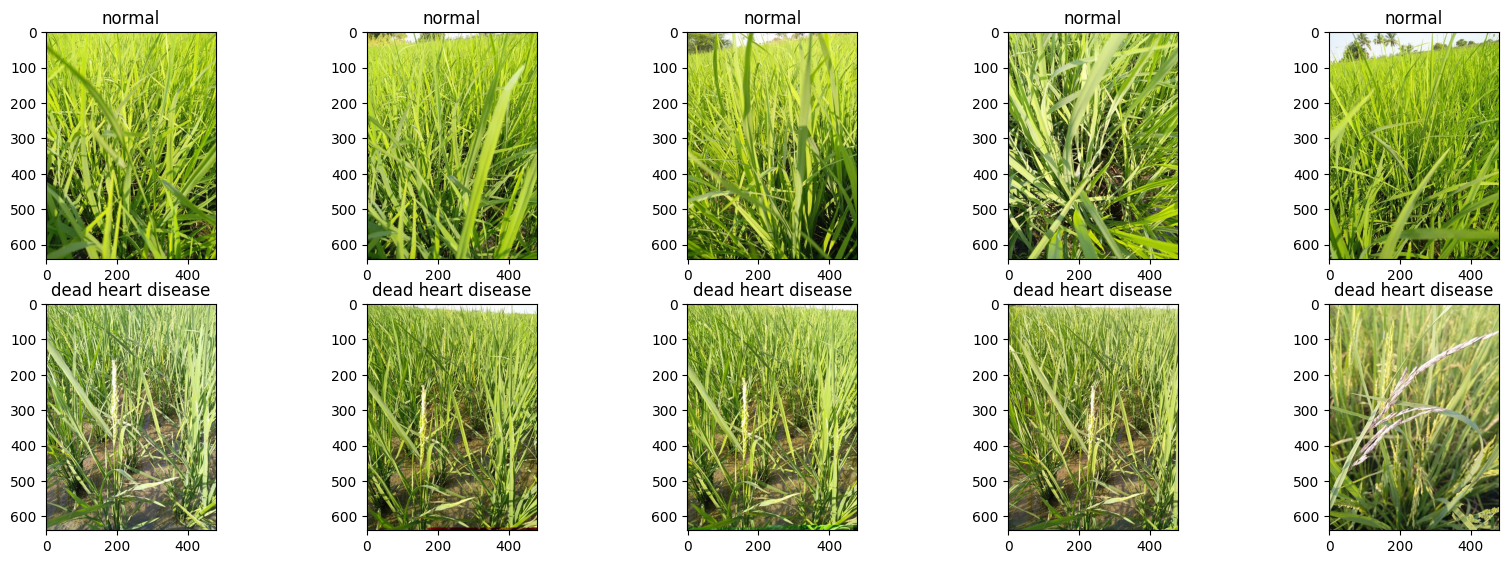

In [ ]:
# make plot of images just to have an idea
plt.figure(figsize=(20,10))
columns = 5
path = '/content/drive/MyDrive/paddy-disease-classification/train_images/'
for i, image_loc in enumerate(np.concatenate((five_normals, five_deads))):
    plt.subplot(10//columns + 1, columns, i + 1)

    if i < 5:
        image=plt.imread(path +"normal/"+ image_loc)
        plt.title("normal")
    else:
        plt.title("dead heart disease")
        image=plt.imread(path +"dead_heart/"+ image_loc)

    plt.imshow(image)

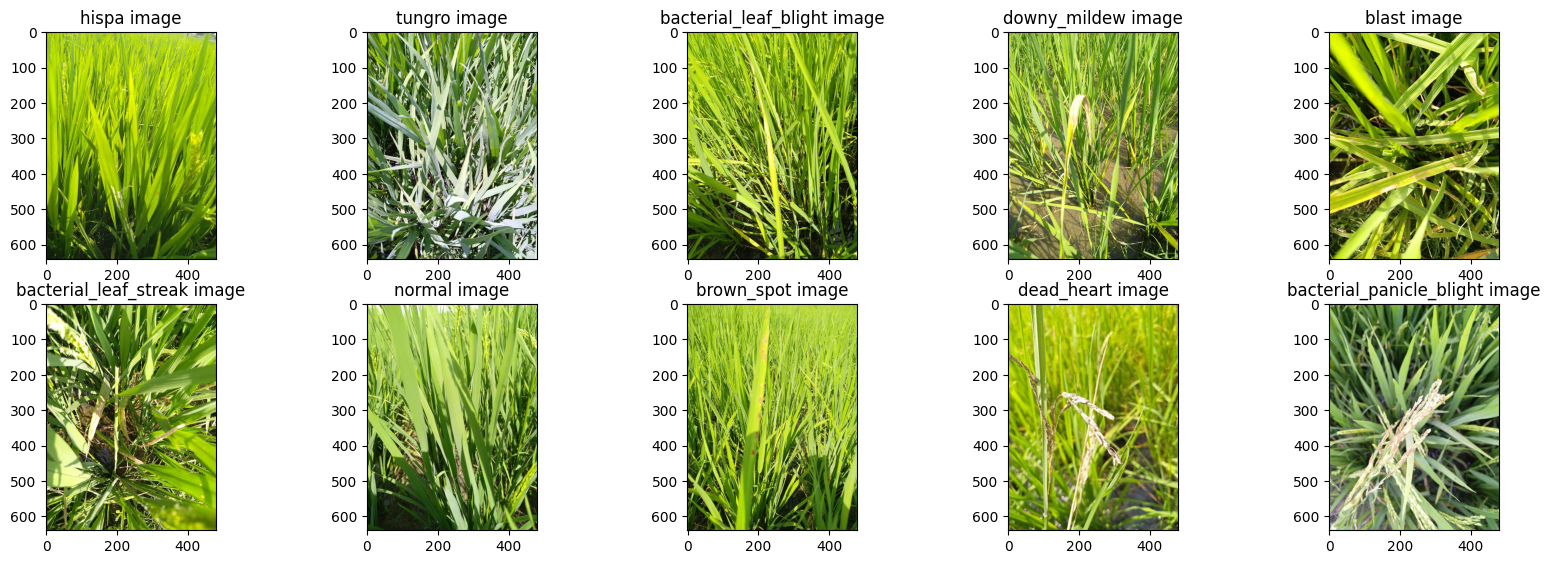

In [ ]:
images = ['/content/drive/MyDrive/paddy-disease-classification/train_images/hispa/106590.jpg',\
          '/content/drive/MyDrive/paddy-disease-classification/train_images/tungro/109629.jpg',\
          '/content/drive/MyDrive/paddy-disease-classification/train_images/bacterial_leaf_blight/109372.jpg',\
          '/content/drive/MyDrive/paddy-disease-classification/train_images/downy_mildew/102350.jpg',\
          '/content/drive/MyDrive/paddy-disease-classification/train_images/blast/110243.jpg',\
          '/content/drive/MyDrive/paddy-disease-classification/train_images/bacterial_leaf_streak/101104.jpg',\
          '/content/drive/MyDrive/paddy-disease-classification/train_images/normal/109760.jpg',\
          '/content/drive/MyDrive/paddy-disease-classification/train_images/brown_spot/104675.jpg',\
          '/content/drive/MyDrive/paddy-disease-classification/train_images/dead_heart/105159.jpg',\
          '/content/drive/MyDrive/paddy-disease-classification/train_images/bacterial_panicle_blight/101351.jpg',\
         ]
diseases = ['hispa','tungro','bacterial_leaf_blight','downy_mildew','blast','bacterial_leaf_streak',\
           'normal','brown_spot','dead_heart','bacterial_panicle_blight']
diseases = [disease + ' image' for disease in diseases]
plt.figure(figsize=(20,10))
columns = 5
for i, image_loc in enumerate(images):
    plt.subplot(len(images)//columns + 1, columns, i + 1)
    image=plt.imread(image_loc)
    plt.title(diseases[i])
    plt.imshow(image)

In [ ]:
# encode both columns label and variety
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])
data['variety'] = label_encoder.fit_transform(data['variety'])

data.head()

,image_id,label,variety,age
0,100330.jpg,0,0,45
1,100365.jpg,0,0,45
2,100382.jpg,0,0,45
3,100632.jpg,0,0,45
4,101918.jpg,0,0,45


In [ ]:
# define parameter
batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10422 files belonging to 10 classes.
Using 8338 files for training.


In [ ]:

val_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10422 files belonging to 10 classes.
Using 2084 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
num_classes = len(class_names)
num_classes

10

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


Epoch 1/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 2069s 8s/step - accuracy: 0.2524 - loss: 2.0674 - val_accuracy: 0.4573 - val_loss: 1.5541
Epoch 2/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 80s 94ms/step - accuracy: 0.5163 - loss: 1.4333 - val_accuracy: 0.6286 - val_loss: 1.1516
Epoch 3/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 25s 94ms/step - accuracy: 0.6853 - loss: 0.9445 - val_accuracy: 0.6713 - val_loss: 1.0252
Epoch 4/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 41s 94ms/step - accuracy: 0.7715 - loss: 0.6875 - val_accuracy: 0.7399 - val_loss: 0.8680
Epoch 5/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 41s 94ms/step - accuracy: 0.8343 - loss: 0.5005 - val_accuracy: 0.7601 - val_loss: 0.8788
Epoch 6/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 24s 94ms/step - accuracy: 0.8710 - loss: 0.3954 - val_accuracy: 0.7754 - val_loss: 0.8350
Epoch 7/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 24s 93ms/step - accuracy: 0.9019 - loss: 0.2979 - val_accuracy: 0.7874 - val_loss: 0.8372
Epoch 8/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 24s 93ms/step - accuracy: 0.9211 - loss: 0

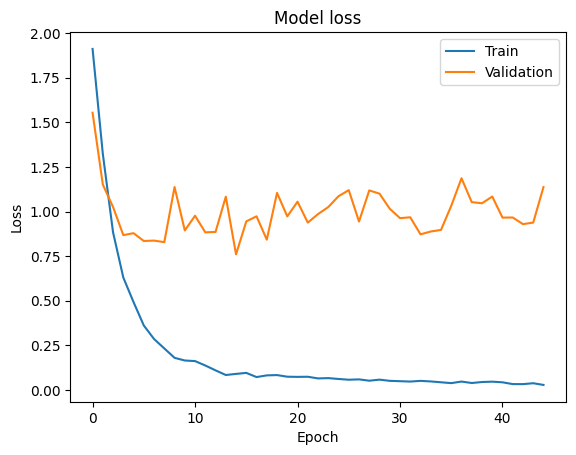

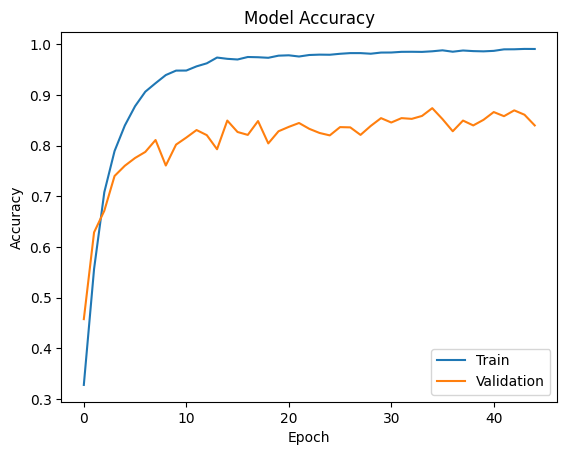

CPU times: user 3min 1s, sys: 53.8 s, total: 3min 55s
Wall time: 56min 57s


In [ ]:
%%time
#remove warnings
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.callbacks import EarlyStopping
# Define the callback function
early_stopping = EarlyStopping(patience=30)

history= model.fit(train_ds,
          validation_data=val_ds,
          epochs=100,
          callbacks=[early_stopping])

# evaluat the model
loss = model.evaluate(val_ds)

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# plot the accuracy of training and validation

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()